## Bloodtypes of PGP Participants

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
import numpy as np
from scipy import stats
import sqlite3

In [86]:
# Set default plot stype for matplotlib
plt.style.use('ggplot')

# Set default figure size for matplotlib
plt.rcParams['figure.figsize'] = (16, 8)

In [87]:
# connect to untap database, found here: 
#https://workbench.su92l.arvadosapi.com/collections/22d61dd43786c65cd175b04ad6954af0+3119/html/index.html#

conn = sqlite3.connect('Database/untap.db')
c = conn.cursor()
c.execute('SELECT * FROM demographics')
rows = c.fetchall()
data = pd.DataFrame(rows,columns=zip(*c.description)[0])
conn.close()
data

,id,human_id,date_of_birth,gender,weight,height,blood_type,race
0,1,hu43860C,1954-08-28 (61 years old),Male,246lbs (112kg),6ft 5in (195cm),O+,White
1,2,huC30901,1962-05-23 (53 years old),Male,175lbs (79kg),6ft 2in (187cm),O-,White
2,3,hu9385BA,1955-07-05 (60 years old),Male,155lbs (70kg),,A+,
3,4,hu04FD18,1954-09-18 (61 years old),Male,,,O+,White
4,5,huAE6220,1949-04-24 (66 years old),Male,,,B+,White
5,6,hu604D39,1958-01-19 (58 years old),Male,245lbs (111kg),5ft 8in (172cm),AB+,Black or African American
6,7,hu6E4515,1921-07-09 (94 years old),Male,180lbs (82kg),6ft (182cm),O+,White
7,8,huA90CE6,1958-09-25 (57 years old),Male,,,,White
8,9,hu34D5B9,1973-01-20 (43 years old),,170lbs (77kg),5ft 11in (180cm),,
9,10,hu2FEC01,1985-10-06 (30 years old),Male,143lbs (65kg),5ft 9in (175cm),A+,White


In [88]:
# Group data by blood type
bloodtype = data.groupby('blood_type')['human_id'].count()
bloodData = pd.DataFrame(columns=['PGP'])
bloodData.PGP = bloodtype[1:]

In [89]:
# Compare distribution of blood type in PGP with that of the general US population
## Note: Blood type distribution taken from American Red Cross website
## http://givebloodgivelife.org/education/bloodtypes.php

bTotal = bloodtype[1:].sum()
bloodData['USA'] = [0.34 ,.06, .03, 0.01, .09, .02, .38, .07];
bloodData['USA'] = bTotal*bloodData['USA']

In [90]:
bloodData2 = bloodData/bTotal
bloodData2

,PGP,USA
blood_type,,
A+,0.313618,0.34
A-,0.077029,0.06
AB+,0.038514,0.03
AB-,0.011004,0.01
B+,0.107290,0.09
B-,0.013755,0.02
O+,0.356259,0.38
O-,0.082531,0.07


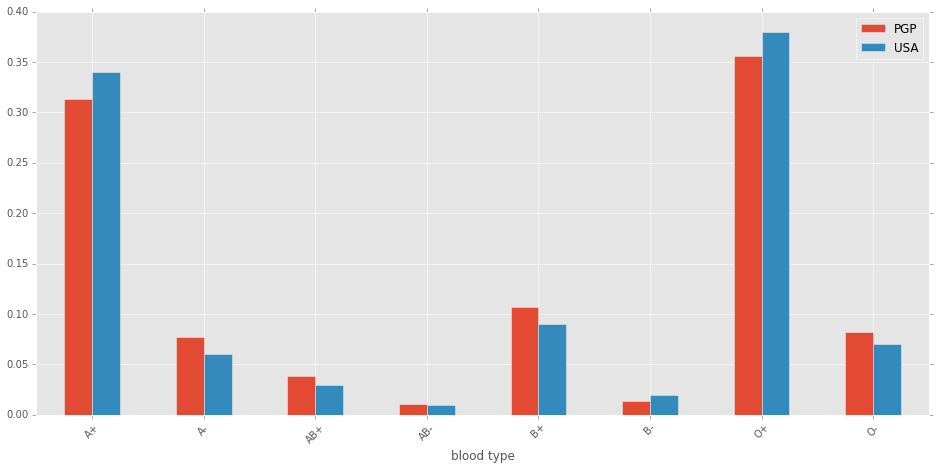

In [91]:
# Plot comparison as a bar plot
ax = bloodData2.plot(kind = 'bar')
labels = ax.get_xticklabels()
ax.set_xticklabels(bloodData.index,rotation=45);
ax.set_xlabel('blood type');
plt.gcf().subplots_adjust(bottom=0.2)

plt.savefig('Images/bloodtypeAll.svg',format='svg')

In [92]:
# Calculate p-value
chi2, pvalue = stats.chisquare(bloodData['PGP'].values, f_exp= bloodData['USA'].values, axis=None)
pvalue

0.063511368112054573

In [93]:
# Now look at comparing results for just White participants
idx = data['race'].str.contains('White',na=False)
dataW = data[idx]

In [102]:
bloodtypeW = dataW.groupby('blood_type')['human_id'].count()
bloodDataW = pd.DataFrame(columns=['PGPWhite'])
bloodDataW.PGPWhite = bloodtypeW[1:]

In [103]:
# Compare distribution of blood type in PGP with that of the general US population
## Note: Blood type distribution taken from American Red Cross website
## http://www.redcrossblood.org/learn-about-blood/blood-types

bTotalW = bloodtypeW[1:].sum()
bloodDataW['White'] = [0.33 ,.07, .03, 0.01, .09, .02,.37, .08];
bloodDataW['White'] = bTotalW*bloodDataW['White']

In [114]:
bloodData2W = bloodDataW/bTotalW
bloodData2W['PGPAll']= bloodData2['PGP']

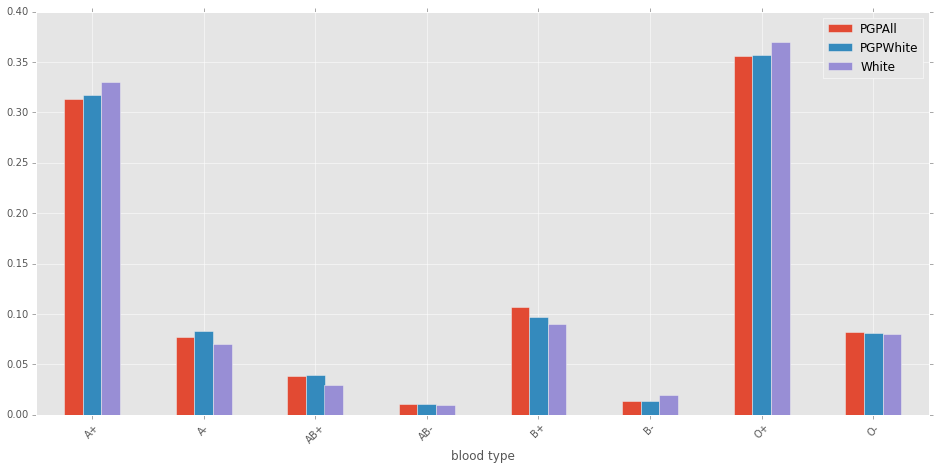

In [115]:
# Plot comparison as a bar plot
ax = bloodData2W[['PGPAll','PGPWhite','White']].plot(kind = 'bar')
labels = ax.get_xticklabels()
ax.set_xticklabels(bloodData.index,rotation=45);
ax.set_xlabel('blood type');
plt.gcf().subplots_adjust(bottom=0.2)

plt.savefig('Images/bloodtypeWhite.svg',format='svg')

In [98]:
# Calculate p-value
chi2, pvalue = stats.chisquare(bloodDataW['PGPWhite'].values, f_exp= bloodDataW['White'].values, axis=None)
pvalue

0.53666552766244691